In [11]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import re

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
foldername = 'post_dump/'
save_name = 'trace65720_pair'

traceid = 65955
n_begin = 500000
n_final = 500500
n_step = 1

filename = foldername + 'pair.dump' + str(n_begin)

with open(filename) as f:
    
    lines = f.readlines()
    id_head_begin = [n for n, line in enumerate(lines) if line[0:13]=='ITEM: ENTRIES'][0]
    header = lines[id_head_begin].split(' ')[2:-1]
    header = header
    
step = n_begin
filename = foldername +'pair.dump' + str(step)
datapd = pd.read_csv(filename, delim_whitespace = True, skiprows = id_head_begin+1, header = None, names = header)

datapd = datapd.loc[ (datapd['c_pair_it[1]'] == traceid) | (datapd['c_pair_it[2]'] == traceid)  ]

datapd.insert(loc = 0, column = 'step', value = step)
    
for step in range(n_begin+1, n_final+1, n_step):
    
    filename = foldername +'pair.dump' + str(step)
    data_onestep = pd.read_csv(filename, delim_whitespace = True, skiprows = id_head_begin+1, header = None, names = header)
    
    data_onestep = data_onestep.loc[ (data_onestep['c_pair_it[1]'] == traceid) | (data_onestep['c_pair_it[2]'] == traceid)  ]
    
    data_onestep.insert(loc = 0, column = 'step', value = step)
    
    
    #data_onestep = np.loadtxt(filename,skiprows=9)
    
    datapd = pd.concat([datapd, data_onestep], ignore_index = True)
    
datapd.to_csv(save_name, index = False)


In [12]:
datapd = pd.read_csv('trace65720_pair')
datapd

,step,index,c_pair_it[1],c_pair_it[2],c_pair_it[3],c_pair_it[4],c_pair_df[1],c_pair_df[2],c_pair_df[3],c_pair_df[4],c_pair_df[5]
0,500000,17543,65525,65955,1,2,0.000788,7.335710e-06,-5.960820e-07,1.140670e-06,-7.221920e-06
1,500000,18326,65955,65526,2,3,0.000871,8.859150e-07,-4.366640e-07,-6.961790e-07,3.309150e-07
2,500000,18327,65955,65935,2,3,0.000871,1.702390e-06,5.364340e-08,1.681520e-06,-2.602770e-07
3,500001,17543,65525,65955,1,2,0.000788,7.335710e-06,-5.960860e-07,1.140670e-06,-7.221930e-06
4,500001,18326,65955,65526,2,3,0.000871,8.859040e-07,-4.366580e-07,-6.961710e-07,3.309110e-07
5,500001,18327,65955,65935,2,3,0.000871,1.702380e-06,5.364430e-08,1.681510e-06,-2.602760e-07
6,500002,17543,65525,65955,1,2,0.000788,7.335710e-06,-5.960890e-07,1.140670e-06,-7.221930e-06
7,500002,18326,65955,65526,2,3,0.000871,8.858860e-07,-4.366490e-07,-6.961570e-07,3.309040e-07
8,500002,18327,65955,65935,2,3,0.000871,1.702360e-06,5.364510e-08,1.681490e-06,-2.602740e-07
9,500003,17543,65525,65955,1,2,0.000788,7.335720e-06,-5.960930e-07,1.140680e-06,-7.221930e-06


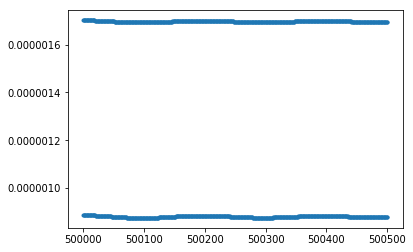

In [14]:
select_id = 65955  #6773 6775 6748
 
datapd_select = datapd.loc[datapd['c_pair_it[1]'] == select_id]

x = datapd_select['step'].values
y = datapd_select['c_pair_df[2]'].values

fig = plt.figure()


plt.plot(x,y,'.')
fig.savefig('test')   # save the figure to file

array([1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05,
       1.25249e-05, 1.25249e-05, 1.25249e-05, 1.25249e-05, 1.252